<a id='Top'></a>
# Unconstrained Optimization

[Example 1](#Example1) <br />
[Example 2](#Example2)

If $F(x)$ has continuous second derivatives, can approximate
function in the neighborhood of an arbitrary point using Taylor series:
$$
F(\mathbf{x}+\Delta \mathbf{x}) \approx F(\mathbf{x}) + \Delta \mathbf{x}^T
\mathbf{g}(\mathbf{x}) + \frac{1}{2} \Delta \mathbf{x}^T G(x) \Delta \mathbf{x} +
\ldots
$$
where $\mathbf{g}$ is the gradient of $F$ and $G $ is the second derivative of $F$ (Hessian matrix)

## First-order condition 
First-order condition for an 
unconstrained minimum from first two terms (assume $\|\Delta \mathbf{x}\| \ll 1$) 

To find the minimum we want to show that $F(\mathbf{x}+\Delta \mathbf{x}) \geq F(\mathbf{x})$

1. Given **sign ambiguity** of term $\Delta \mathbf{x}^T
\mathbf{g}(\mathbf{x})$, can only avoid cost decrease at local solution 
(i.e. that $F(\mathbf{x}+\Delta \mathbf{x}) < F(\mathbf{x})$ for all possible $\Delta \mathbf{x}$)  if
$
\mathbf{g}(\mathbf{x}^*)=0
$
2. This result is a necessary and sufficient condition for solution $\mathbf{x}^*$ to be **Stationary Point**

3. It is a necessary, but **not** sufficient condition to be a minima as the stationary point could also be a maximum or saddle point.



<a id='Example1'></a>
## Example 1  
Consider a foil suspended in a moving gas (e.g., flat plate wing). Lift according to Newtonian fluid mechanics given as a function of angle of attack
$$
L(\alpha) = K \sin^2(\alpha) \cos(\alpha) \qquad K > 0
$$
What is the optimal angle of attack ($0 \leq \alpha \leq \pi$) to utilize?


First derivative
$$
\frac{\partial L}{\partial \alpha} = K(2 \sin (\alpha) \cos^2(\alpha) - \sin^3(\alpha)) = 0
$$
yielding:
1. $\sin(\alpha)=0$ i.e., $\alpha=0$
2. $2 \cos^2(\alpha) - \sin^2(\alpha)=0$ i.e., $\tan(\alpha)=\pm \sqrt{2}$   


In [16]:
from os.path import exists
file_exists = exists('basic_material.py')

if (not file_exists):
  !wget -O basic_material.py https://www.dropbox.com/s/3aoexl8vxyitmds/basic_material.py?dl=0
%run basic_material

try:
    %reload_ext autoreload
except:
    %load_ext autoreload
%autoreload 2

import pandas as pd

if os.path.isdir("./figs/"):
    pass
else:
    !mkdir ./figs

Running Python: 3.9.9


### Define the function and compute first and second derivatives 

In [17]:
sA,sK = sym.symbols('A,K')
fun = sK*sym.cos(sA)*sym.sin(sA)**2  
numfun=sym.lambdify([sA,sK],fun) 
gradfun=sym.diff(fun,sA) #take the gradient symbolically wrt x
numgradfun=sym.lambdify([sA,sK],gradfun) #turn into a bivariate lambda for numpy
hessfun=sym.diff(gradfun,sA) #take the gradient symbolically wrt x
numhessfun=sym.lambdify([sA,sK],hessfun) #turn into a bivariate lambda for numpy

def FoilLift(A, K = 2):
    return numfun(A,K)

def FoilLift_first_deriv(A, K = 2):
    return numgradfun(A,K)

def FoilLift_sec_deriv(A, K = 2):
    return numhessfun(A,K)

### Find stationary points (satisfy condition that first derivative is zero) - try simple brute force search

In [18]:
# brute force root finder
roots=[]
for x0 in np.arange(-1.25*np.pi, 1.25*np.pi, 0.01):
    sol, info, ier, mesg = optimize.fsolve(FoilLift_first_deriv, [x0,2], xtol=1e-11,full_output=True)
    if (ier == 1):
        roots.append(sol[0])

### Plot the results to see where these stationary points lie on the function

    Alpha          Lift
0 -3.1416 -1.079395e-10
1 -2.1863 -7.698004e-01
2 -0.9553  7.698004e-01
3 -0.0000  0.000000e+00
4  0.9553  7.698004e-01
5  2.1863 -7.698004e-01
6  3.1416 -1.079395e-10
Clearly some of these are min and some are max (locally)


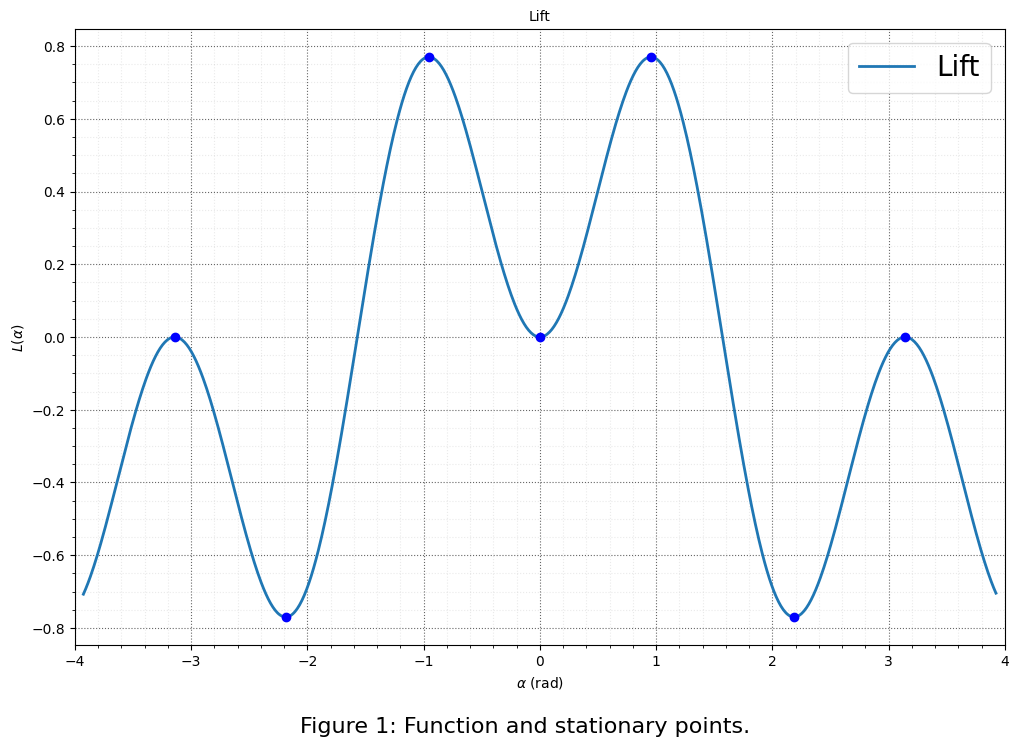

In [19]:
alpha = np.arange(-1.25*np.pi, 1.25*np.pi, 0.01)
L = FoilLift(alpha)

fig = plt.figure(1,figsize=(12,8))
ax = fig.add_subplot()
ax.plot(alpha,L,label='Lift')
ax.legend(fontsize=20)

ax.set_xlabel(r'$\alpha$ (rad)')
ax.set_ylabel(r'$L(\alpha)$')
ax.set_title('Lift')
ax.set_xlim([-4,4])
nicegrid(ax)

# known stationary points
alpha_stat = np.unique(np.round(roots,4))
alpha_stat = alpha_stat[alpha_stat > -1.25*np.pi]
alpha_stat = alpha_stat[alpha_stat < 1.25*np.pi]
plt.plot(alpha_stat, FoilLift(alpha_stat), 'bo')

table = []
table.append(alpha_stat)
table.append(FoilLift(alpha_stat))
df = pd.DataFrame(table, index=['Alpha', 'Lift'])
df[df.isna()]=0
print(df.T)
print("Clearly some of these are min and some are max (locally)")

txt="Figure 1: Function and stationary points."
plt.figtext(0.5, 0, txt, wrap=True, horizontalalignment='center', fontsize=16)
fig.savefig("figs/Lift.png")
plt.show()


## Second Order Conditions

Now consider information at a stationary point from higher derivatives. 
Additional conditions can be derived from the Taylor expansion if we
set $\mathbf{g}(\mathbf{x}^*)=0$ (first order condition) in which case:
$$
F(\mathbf{x}^*+\Delta \mathbf{x}) \approx F(\mathbf{x}^*) + \frac{1}{2} \Delta \mathbf{x}^T G(\mathbf{x}^*) \Delta \mathbf{x} + \ldots
$$

1. For a strong minimum, need $\Delta \mathbf{x}^T G(\mathbf{x}^*) \Delta
\mathbf{x} > 0$ for all $\Delta \mathbf{x}$, which is sufficient to ensure that
$F(\mathbf{x}^*+\Delta \mathbf{x}) > F(\mathbf{x}^*)$.

2. To ensure $\Delta \mathbf{x}^T G(\mathbf{x}^*) \Delta
\mathbf{x} > 0$ for arbitrary $\Delta \mathbf{x} \neq 0$,
**sufficient** condition is that $G(\mathbf{x}^*) > 0$. i.e. a Positive Definite Matrix

Thus the **second order** necessary condition for a strong minimum is that $G(\mathbf{x}^*) \geq 0$ (PSD), because in this case higher order
terms in the expansion could play an important role.

**Summary:** for a stationary point require $\mathbf{g}(\mathbf{x}^*)=0$,
and for local minimum need
1. $G(\mathbf{x}^*) > 0$ sufficient, or
2. $G(\mathbf{x}^*) \geq 0$ necessary


The stationary points are marked as blue dots in Figure 1 - the next step is to confirm which type of stationary point they are - check second derivative
$$
\frac{\partial^2 L}{\partial \alpha^2} = K(2\, {\cos^3\left(\alpha\right)} - 7\, \cos\left(\alpha\right)\, {\sin^2\left(\alpha\right)}
) = 0
$$
1. At $\alpha=0$, $\displaystyle \frac{\partial^2 L}{\partial \alpha^2}=2K > 0$ indicating local min
2. At $\alpha=0.9553$, $\displaystyle \frac{\partial^2 L}{\partial \alpha^2}=-2.3K < 0$ indicating local max
3. At $\alpha=\pi-0.9553$, $\displaystyle \frac{\partial^2 L}{\partial \alpha^2}= 2.3K > 0$ indicating local max
4. At $\alpha=\pi$, $\displaystyle \frac{\partial^2 L}{\partial \alpha^2}= -2K < 0$ indicating local max


In [12]:
print('Possible Stationary Points - investigate Second Derivative')
table = []
table.append(alpha_stat)
table.append(FoilLift_sec_deriv(alpha_stat))
df = pd.DataFrame(table, index=['Alpha', 'Second Deriv'])
df[df.isna()]=0
print(df.T)

Possible Stationary Points - investigate Second Derivative
    Alpha  Second Deriv
0 -3.1416     -4.000000
1 -2.1863      4.618724
2 -0.9553     -4.618748
3 -0.0000      4.000000
4  0.9553     -4.618748
5  2.1863      4.618724
6  3.1416     -4.000000


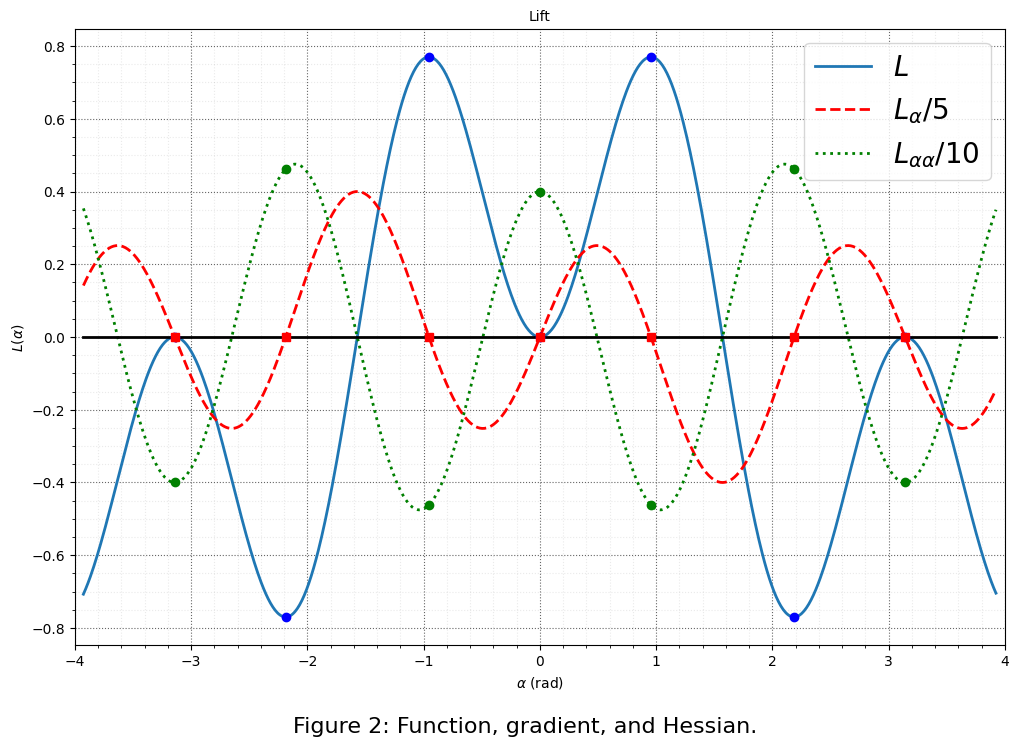

In [6]:
# show the function stationary points with the first/second derivatives
fig = plt.figure(2,figsize=(12,8))

# Adds subplot on position 1
ax = fig.add_subplot()
ax.plot(alpha,L,label='$L$')
ax.plot(alpha,FoilLift_first_deriv(alpha)/5,'r',linestyle='dashed',label=r'$L_{\alpha}/5$')
ax.plot(alpha,FoilLift_sec_deriv(alpha)/10,'g',linestyle='dotted',label=r'$L_{\alpha\alpha}/10$')
ax.plot(alpha,alpha*0,'k')
ax.legend(fontsize=20)

ax.set_xlabel(r'$\alpha$ (rad)')
ax.set_ylabel(r'$L(\alpha)$')
ax.set_title('Lift')
ax.set_xlim([-4,4])
plt.plot(alpha_stat, FoilLift(alpha_stat), 'bo')
plt.plot(alpha_stat, FoilLift_first_deriv(alpha_stat)/5, 'rs')
plt.plot(alpha_stat, FoilLift_sec_deriv(alpha_stat)/10, 'go')
ax.grid()
txt="Figure 2: Function, gradient, and Hessian."
plt.figtext(0.5, 0, txt, wrap=True, horizontalalignment='center', fontsize=16)
nicegrid()

fig.savefig("figs/Lift_all.png")
plt.show()

Plot confirms our analysis above - some of the stationary points are local minimia ($L_{\alpha\alpha} > 0$), some are local max ($L_{\alpha\alpha} < 0$), and $\pm$0.9553 are global max

<a id='Example2'></a>
# Example 2

Consider following simple problem -- for scalar system with
dynamics
$
\dot x = a x + b u
$, 
find control law of the form $u=-kx$ that minimizes:
$$
J=\frac{1}{2}\int_0^\infty (q x^2 + r u^2) dt \text{ with }
q > 0, r > 0, \text{ and given } x(0)
$$

Can solve for $x(t)$ as
$$
x(t)=x(0)e^{(a-bk)t}
$$
and substitute in the cost functional to get
$$
J=\frac{1}{2}\int_0^\infty x(0)^2(q  + r k^2)e^{2(a-bk)t} dt
$$

For now assume that $k$ is an unconstrained constant that stabilizes the system (so $a-bk < 0$). THis is a constraint, but as we will see, it is not an "active" one [more on that later]. 

Given this result, the integral converges to 
$$
J=\frac{-x(0)^2}{4}\frac{q+rk^2}{a-bk} >0
$$
To find the unconstrained stationary points set ($\min_k J$), solve for $k$ using
$$
\dfrac{\partial J}{\partial k} = 0 \quad \Rightarrow \quad -k^2r + k \frac{2ar}{b} + q =0,
$$
Will see later that this is the **Riccati equation** for LQR.

Also note that $$
\frac{\partial^2 J}{\partial k^2}= \frac{-x(0)^2}{2} \frac{\left(r a^2 + q b^2\right)}{{\left(a - b k\right)}^3} > 0
$$
so that this stationary point is a minimum

We can now experiment with the choices of the weights ($q$ in the case) to see the impact on the answer

[Back to Top](#Top)

In [7]:
def func(logq=0):
    a = 10
    b = 1
    q = 10**logq
    r = 1
    x0 = 2

    N = 100
    if (logq > 3):
        N = 200
    Kone = np.roots([-r, 2*a*r/b, 1])
    Kall = np.roots([-r, 2*a*r/b, q])
    print('Optimal choice of k = '+str(round(Kall[0],5)))
    time = np.arange(0,1,.001)

    J = np.zeros(N+1)
    kk = 0
    Krange = np.arange(0,N+1,1)
    Krange2 = np.arange(a+1,N+1,.1)
    for k in Krange:
        if (a-b*k < 0):
            J[kk] = -x0**2/4 *(q+r*k**2)/(a-b*k)
        else:
            J[kk] = 1000
        kk += 1

    sk = sym.symbols('k')
    fun2 = -x0**2/4*(q+r*sk**2)/(a-b*sk)  
    numfun2 = sym.lambdify([sk],fun2) 
    gradfun2 = sym.diff(fun2,sk) #take the gradient symbolically wrt x
    numgradfun2 = sym.lambdify([sk],gradfun2) #turn into a bivariate lambda for numpy
    hessfun2 = sym.diff(gradfun2,sk) #take the gradient symbolically wrt x
    numhessfun2 = sym.lambdify([sk],hessfun2) #turn into a bivariate lambda for numpy

    plt.figure(1,figsize=(12,12))
    ax1 = plt.subplot(221)
    ax1.plot(Krange,J,'b-',label=r'$J(k)$',lw=1)
    ax1.plot(Krange2,numfun2(Krange2),'r:',label=r'$J(k)$',lw=2)
    plt.ylabel(r'$J$')
    if (logq < 3):
        plt.ylim([20, 100])
        plt.xlim([10, 50])
    else:
        plt.ylim([50, 300])
        plt.xlim([50, 150])
    ax1.text(10,25,'a = '+str(a)+', b = '+str(b)+', q = '+str(round(q,1))+', r = '+str(r))
    plt.legend(loc='best')
    plt.grid()

    ax2 = plt.subplot(223,sharex=ax1)
    ax2.plot(Krange2,numgradfun2(Krange2),'g-',label=r'$J_k$',lw=2)
    ax2.plot(Krange2,numhessfun2(Krange2),'c--',label=r'$J_{kk}$',lw=2)
    plt.xlabel(r'$k$')
    plt.ylabel(r'$J$')
    if (logq < 3):
        plt.ylim([-2, 2])
        plt.xlim([10, 50])
    else:
        plt.ylim([-2, 2])
        plt.xlim([50, 150])
    plt.legend(loc='best')
    plt.grid()

    ax3 = plt.subplot(222)
    ax3.plot(time,np.exp((a-b*Kall[0])*time)*x0,'b-',label=r'$x(t)$ with $q=$'+str(round(q,1)),lw=2)
    ax3.plot(time,np.exp((a-b*Kone[0])*time)*x0,'g--',label=r'$x(t)$ with $q=1$',lw=2)
    plt.xlabel(r'$t$')
    plt.ylabel(r'$x(t)$')
    plt.xlim([0, 1])
    plt.legend(loc='best')
    plt.grid()

    ax4 = plt.subplot(224)
    ax4.plot(time,Kall[0]*np.exp((a-b*Kall[0])*time)*x0,'b-',label=r'$u(t)$ with $q=$'+str(round(q,1)),lw=2)
    ax4.plot(time,Kone[0]*np.exp((a-b*Kone[0])*time)*x0,'g--',label=r'$u(t)$ with $q=1$',lw=2)
    plt.xlabel(r'$t$')
    plt.ylabel(r'$u(t)$')
    plt.xlim([0, 1])
    plt.legend(loc='best')
    plt.grid()

    plt.savefig("figs/LQR_scalar.png")
    plt.show()

y_wid=interactive(func,logq=(0,4,.5))
y_wid

interactive(children=(FloatSlider(value=0.0, description='logq', max=4.0, step=0.5), Output()), _dom_classes=(…

Increasing $q$ above the nominal value of 1 changes the cost (it increases), shifting the min value to larger values of $k$. In this case the feedback controller is stronger because the cost functional is more concerned about the values of $x$ being non-zero -- the resulting state response will converge to zero very quickly, exerting a lot of control effort to do so. 